<b>Author:</b> Reinaldo Maciel <br>
<b>Date:</b> Dec, 1st 2021 <br>
<b>Summary:</b> This notebook makes an EDA analysis on bike sharing data.

### 01.Importing Libraries

In [1]:
import pandas as pd
import sys
sys.path.insert(1, '../src')
import getData
import seaborn as sns
import Utils as ut

### 02. Load data

In [2]:
#getData.download()
df_hour = pd.read_csv('../data/BSD/hour.csv')
df_day = pd.read_csv('../data/BSD/day.csv')

In [12]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [13]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### 03.EDA

In [14]:
### Dataset Size
print('Size of hour dataset: ', df_hour.shape)
print('Size of day dataset: ', df_day.shape)

Size of hour dataset:  (17379, 17)
Size of day dataset:  (731, 16)


In [16]:
### Volume of missing data by column HOUR DF
df_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [17]:
### Volume of missing data by column DAY DF
df_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [18]:
### DF_HOUR DATATYPES
df_hour.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [19]:
### DF_Day DATATYPES
df_day.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

#### 03.1 Converting dates from objects to date

In [22]:
df_hour.dteday = pd.to_datetime(df_hour.dteday, format='%Y-%m-%d')
df_day.dteday = pd.to_datetime(df_day.dteday, format='%Y-%m-%d')

#### 03.2 Correlation between Numeric variables and target


In [23]:
df_hour[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.987672,-0.069881,-0.023125,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.400929
hum,-0.069881,-0.051918,1.000000,-0.290105,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.093234
cnt,0.404772,0.400929,-0.322911,0.093234,1.000000


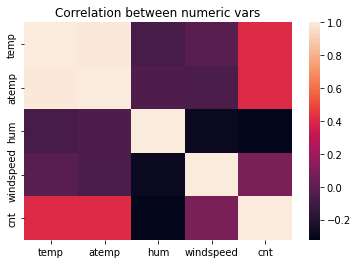

In [28]:
sns.heatmap(df_hour[['temp', 'atemp', 'hum', 'windspeed', 'cnt']]\
    .corr()).set_title('Correlation between numeric vars');

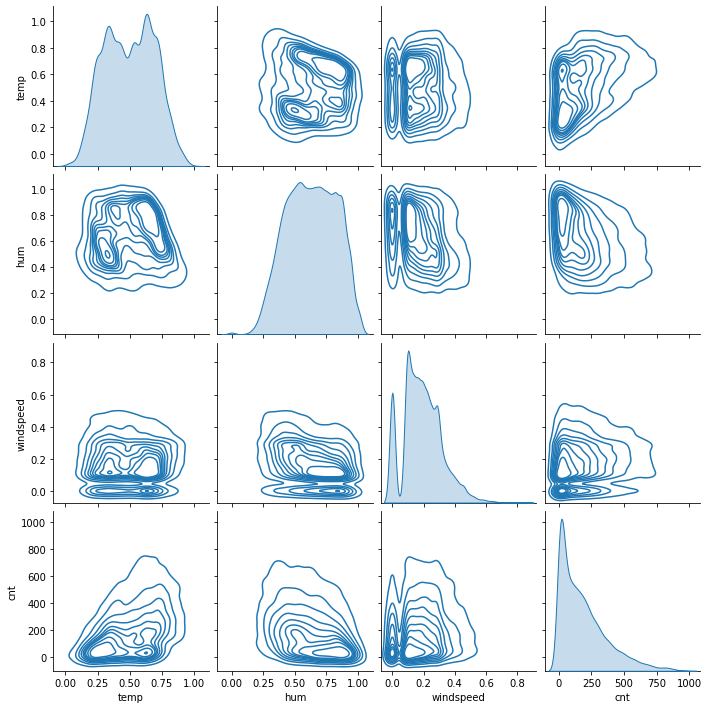

In [32]:
sns.pairplot(df_hour[['temp', 'hum', 'windspeed', 'cnt']], kind='kde');

#### 03.3 Removing atemp column

In [29]:
df_hour.drop(columns=['atemp'], inplace=True)
df_day.drop(columns=['atemp'], inplace=True)

#### 03.4 Correlation between cat vars

In [39]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.75,0.0,0,1,1


In [3]:
w = ut.Utils(df_hour)

In [4]:
w.NameCategoricals()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,winter,0,january,0,business day,saturday,0,clear,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,winter,0,january,1,business day,saturday,0,clear,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,winter,0,january,2,business day,saturday,0,clear,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,winter,0,january,3,business day,saturday,0,clear,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,winter,0,january,4,business day,saturday,0,clear,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,winter,1,december,19,business day,monday,1,mist,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,winter,1,december,20,business day,monday,1,mist,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,winter,1,december,21,business day,monday,1,clear,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,winter,1,december,22,business day,monday,1,clear,0.26,0.2727,0.56,0.1343,13,48,61


In [5]:
df_hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,winter,0,january,0,business day,saturday,0,clear,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,winter,0,january,1,business day,saturday,0,clear,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,winter,0,january,2,business day,saturday,0,clear,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,winter,0,january,3,business day,saturday,0,clear,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,winter,0,january,4,business day,saturday,0,clear,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,winter,1,december,19,business day,monday,1,mist,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,winter,1,december,20,business day,monday,1,mist,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,winter,1,december,21,business day,monday,1,clear,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,winter,1,december,22,business day,monday,1,clear,0.26,0.2727,0.56,0.1343,13,48,61
